# Akbank Bootcamp Projesi

## Airplane â€“ Car â€“ Ship GÃ¶rsel SÄ±nÄ±flandÄ±rma Projesi

Bu projenin amacÄ±, gÃ¶rÃ¼ntÃ¼lerden **uÃ§ak, araba ve gemi** sÄ±nÄ±flarÄ±nÄ± ayÄ±rt edebilen 
bir **CNN tabanlÄ± derin Ã¶ÄŸrenme modeli** geliÅŸtirmektir.  
Proje kapsamÄ±nda veri Ã¶niÅŸleme, model eÄŸitimi, deÄŸerlendirme ve hiperparametre optimizasyonu adÄ±mlarÄ± uygulanacaktÄ±r.


## Ã–ncelikle veri daÄŸÄ±lÄ±mÄ±nÄ± gÃ¶rselleÅŸtirip bakalÄ±m

SÄ±nÄ±flar: ['ship', 'cars', 'airplanes']
Train daÄŸÄ±lÄ±mÄ±: {'ship': 850, 'cars': 850, 'airplanes': 850}
Test daÄŸÄ±lÄ±mÄ±: {'ship': 200, 'cars': 193, 'airplanes': 189}


/tmp/ipykernel_1630571/2674131454.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette="Blues_d")
/tmp/ipykernel_1630571/2674131454.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), palette="Greens_d")
/tmp/ipykernel_1630571/2674131454.py:36: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/comp5/ARTEK/umut/AkbankBootcamp/akbank_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


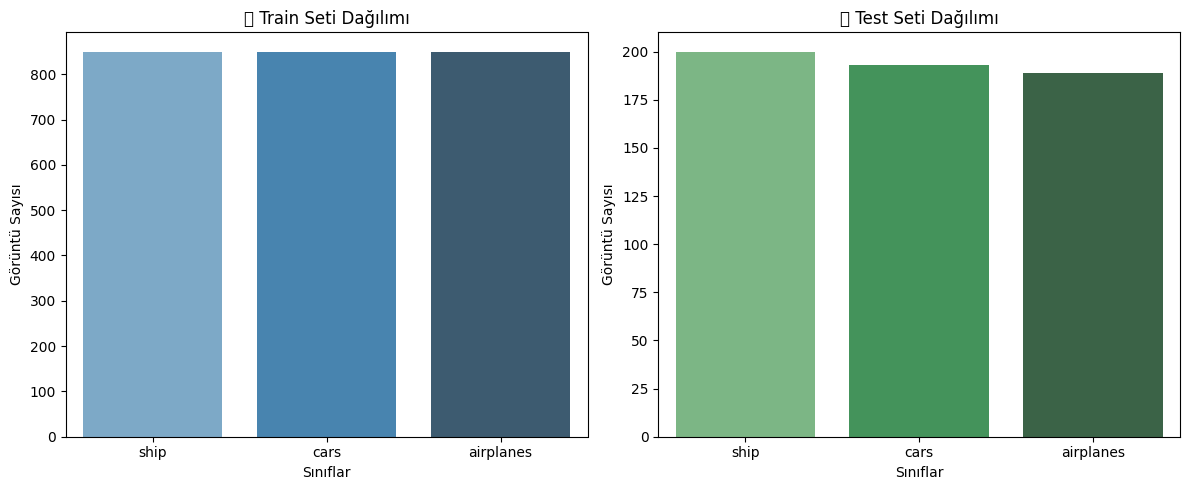

/tmp/ipykernel_1630571/2674131454.py:56: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/comp5/ARTEK/umut/AkbankBootcamp/akbank_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


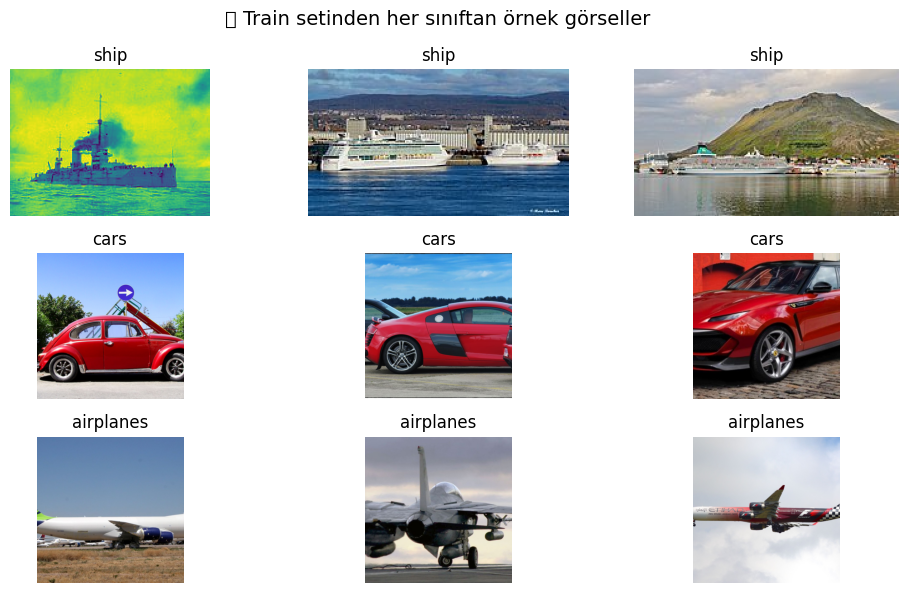

In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
# ðŸ“‚ Veri seti yollarÄ±
train_dir = "/home/comp5/ARTEK/umut/AkbankBootcamp/dataset_akbank/train"
test_dir = "/home/comp5/ARTEK/umut/AkbankBootcamp/dataset_akbank/test"

# SÄ±nÄ±flarÄ± al
classes = os.listdir(train_dir)
print("SÄ±nÄ±flar:", classes)

# Train ve Test daÄŸÄ±lÄ±mlarÄ±
train_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in classes}
test_counts = {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in classes}

print("Train daÄŸÄ±lÄ±mÄ±:", train_counts)
print("Test daÄŸÄ±lÄ±mÄ±:", test_counts)

# ðŸ”¹ Train daÄŸÄ±lÄ±mÄ± grafiÄŸi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette="Blues_d")
plt.title("ðŸ“Š Train Seti DaÄŸÄ±lÄ±mÄ±")
plt.ylabel("GÃ¶rÃ¼ntÃ¼ SayÄ±sÄ±")
plt.xlabel("SÄ±nÄ±flar")

# ðŸ”¹ Test daÄŸÄ±lÄ±mÄ± grafiÄŸi
plt.subplot(1, 2, 2)
sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), palette="Greens_d")
plt.title("ðŸ“Š Test Seti DaÄŸÄ±lÄ±mÄ±")
plt.ylabel("GÃ¶rÃ¼ntÃ¼ SayÄ±sÄ±")
plt.xlabel("SÄ±nÄ±flar")

plt.tight_layout()
plt.show()

# ðŸ”¹ Train setinden Ã¶rnek gÃ¶rseller
plt.figure(figsize=(10, 6))
for idx, cls in enumerate(classes):
    class_path = os.path.join(train_dir, cls)
    images = os.listdir(class_path)
    sample_images = random.sample(images, 3)

    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)

        plt.subplot(len(classes), 3, idx*3 + i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(cls)

plt.suptitle("ðŸ“¸ Train setinden her sÄ±nÄ±ftan Ã¶rnek gÃ¶rseller", fontsize=14)
plt.tight_layout()
plt.show()


### Yukardaki daÄŸÄ±lÄ±ma baktÄ±ÄŸÄ±mÄ±z zaman dengeli bir sÄ±nÄ±fÄ±mÄ±z olduÄŸunu gÃ¶rÃ¼yoruz. Åžimdi Ã¶n iÅŸleme kÄ±smÄ±na geÃ§elim

## Veri Ã–niÅŸleme

### Bu aÅŸamada veri seti train/val/test olarak organize edilmiÅŸtir.  
Val seti, trainâ€™den %15 oranÄ±nda ayrÄ±lmÄ±ÅŸtÄ±r.  

GÃ¶rseller Ã¼zerinde ÅŸu Ã¶niÅŸlemeler uygulanacaktÄ±r:
- OranÄ± koruyarak **letterbox + resize (224x224)**
- Train iÃ§in hafif veri artÄ±rma (**random horizontal flip, kÃ¼Ã§Ã¼k rotation**)
- Val/Test iÃ§in sadece deterministik Ã¶lÃ§ekleme
- Normalize (ImageNet mean/std)

AmaÃ§: Nesnelerin ÅŸekil ve arka plan Ã¶zelliklerini koruyarak modelin Ã¶ÄŸrenmesini saÄŸlamaktÄ±r.

In [5]:
# --- Gereken kÃ¼tÃ¼phaneler ---
import os, torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image

# --- Letterbox fonksiyonu ---
def letterbox_pil(img: Image.Image, size=224, pad_color=(0,0,0)):
    w, h = img.size
    scale = min(size / w, size / h)
    nw, nh = int(w * scale), int(h * scale)
    im = img.resize((nw, nh), Image.BICUBIC)
    canvas = Image.new("RGB", (size, size), pad_color)
    canvas.paste(im, ((size - nw)//2, (size - nh)//2))
    return canvas

### Transform TanÄ±mlarÄ±
- **Train Transform:** Letterbox + Augmentation + Normalize  
- **Val/Test Transform:** Letterbox + Normalize


In [6]:
IMG_SIZE = 224
BS = 32
NUM_WORKERS = 2

# Normalizasyon iÃ§in ImageNet ortalama / std
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]

# Val/Test: deterministik
eval_tf = transforms.Compose([
    transforms.Lambda(lambda im: letterbox_pil(im, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

# Train: deterministik + augmentation
train_tf = transforms.Compose([
    transforms.Lambda(lambda im: letterbox_pil(im, IMG_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])


### Dataset ve DataLoader
Train/Val/Test klasÃ¶rleri ImageFolder formatÄ±nda okunur.  
DataLoader ile batch halinde modele aktarÄ±lÄ±r.


In [7]:
ROOT = "/home/comp5/ARTEK/umut/AkbankBootcamp/dataset_akbank"  # senin dataset kÃ¶kÃ¼n

train_ds = datasets.ImageFolder(os.path.join(ROOT, "train"), transform=train_tf)
val_ds   = datasets.ImageFolder(os.path.join(ROOT, "val"),   transform=eval_tf)
test_ds  = datasets.ImageFolder(os.path.join(ROOT, "test"),  transform=eval_tf)

train_loader = DataLoader(train_ds, batch_size=BS, shuffle=True,  num_workers=NUM_WORKERS, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=BS, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=BS, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)

class_names = train_ds.classes
num_classes = len(class_names)

print("SÄ±nÄ±flar:", class_names)


SÄ±nÄ±flar: ['airplanes', 'cars', 'ship']


### Veri Seti Ã–zet
Her sÄ±nÄ±fÄ±n train/val/test daÄŸÄ±lÄ±mÄ± aÅŸaÄŸÄ±da incelenebilir.


/tmp/ipykernel_1630571/3689127838.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), ax=axs[0], palette="Blues")
/tmp/ipykernel_1630571/3689127838.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()), ax=axs[1], palette="Oranges")
/tmp/ipykernel_1630571/3689127838.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), ax=axs[2], palette="Greens")


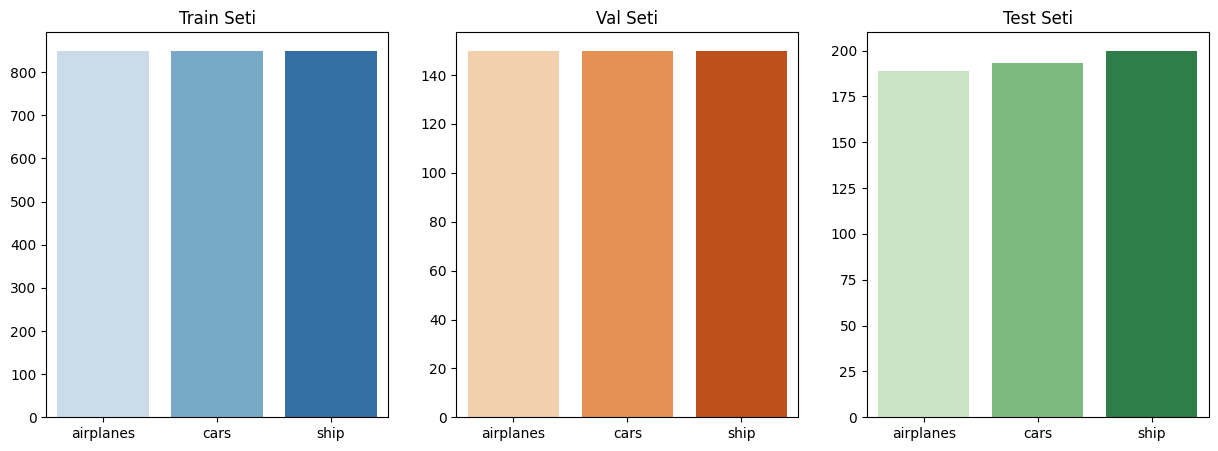

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def count_images(path):
    counts = {}
    for cls in class_names:
        cls_path = os.path.join(path, cls)
        counts[cls] = len([f for f in os.listdir(cls_path) if f.lower().endswith(('jpg','jpeg','png'))])
    return counts

train_counts = count_images(os.path.join(ROOT, "train"))
val_counts   = count_images(os.path.join(ROOT, "val"))
test_counts  = count_images(os.path.join(ROOT, "test"))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), ax=axs[0], palette="Blues")
axs[0].set_title("Train Seti")
sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()), ax=axs[1], palette="Oranges")
axs[1].set_title("Val Seti")
sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), ax=axs[2], palette="Greens")
axs[2].set_title("Test Seti")
plt.show()


## Modelin EÄŸitilmesi

Bu bÃ¶lÃ¼mde **CNN tabanlÄ± bir model** eÄŸitilecektir.  
BaÅŸlangÄ±Ã§ iÃ§in **Transfer Learning (ResNet18)** kullanÄ±lacak, son katman proje sÄ±nÄ±flarÄ±na gÃ¶re yeniden dÃ¼zenlenecektir.  

EÄŸitim sÄ±rasÄ±nda:
- Loss fonksiyonu: CrossEntropyLoss  
- Optimizer: Adam  
- Ã–ÄŸrenme hÄ±zÄ±: 1e-3  
- Erken durdurma (Early Stopping) uygulanacaktÄ±r. 

In [9]:
import torch
import torch.nn as nn
from torchvision.models import resnet18

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("KullanÄ±lan cihaz:", device)

# ResNet18 modelini yÃ¼kle
model = resnet18(weights="IMAGENET1K_V1")
model.fc = nn.Linear(model.fc.in_features, num_classes)  # son katmanÄ± gÃ¼ncelle
model = model.to(device)

# Loss ve optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

# LR Scheduler (val loss iyileÅŸmezse Ã¶ÄŸrenme hÄ±zÄ±nÄ± dÃ¼ÅŸÃ¼r)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=2)


KullanÄ±lan cihaz: cuda


### EÄŸitim FonksiyonlarÄ±
Train ve Validation dÃ¶ngÃ¼sÃ¼ ayrÄ± fonksiyonlarla tanÄ±mlanÄ±r.


In [10]:
from tqdm import tqdm

def run_epoch(loader, model, train=True):
    if train:
        model.train()
    else:
        model.eval()
    total_loss, correct, total = 0.0, 0, 0
    for x, y in tqdm(loader, desc="Train" if train else "Val", leave=False):
        x, y = x.to(device), y.to(device)
        if train:
            optimizer.zero_grad()
        with torch.set_grad_enabled(train):
            out = model(x)
            loss = criterion(out, y)
            if train:
                loss.backward()
                optimizer.step()
        total_loss += loss.item() * x.size(0)
        pred = out.argmax(1)
        correct += (pred == y).sum().item()
        total += x.size(0)
    return total_loss/total, correct/total


### EÄŸitim DÃ¶ngÃ¼sÃ¼
Epoch bazÄ±nda train/val loss ve accuracy deÄŸerleri takip edilecektir.  
En iyi model `best_model.pth` dosyasÄ±na kaydedilecektir.


In [13]:
EPOCHS = 15
best_val_loss = float("inf")
patience, wait = 3, 0
best_path = "best_model.pth"

train_hist, val_hist = [], []

for epoch in range(1, EPOCHS+1):
    tr_loss, tr_acc = run_epoch(train_loader, model, train=True)
    val_loss, val_acc = run_epoch(val_loader, model, train=False)
    scheduler.step(val_loss)

    train_hist.append((tr_loss, tr_acc))
    val_hist.append((val_loss, val_acc))

    print(f"[{epoch:02d}] Train Loss: {tr_loss:.4f}, Acc: {tr_acc:.3f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.3f}")

    if val_loss < best_val_loss:
        best_val_loss, wait = val_loss, 0
        torch.save({"model": model.state_dict(), "classes": class_names}, best_path)
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping tetiklendi.")
            break


[01] Train Loss: 0.0313, Acc: 0.992 | Val Loss: 0.0638, Acc: 0.980


[02] Train Loss: 0.0535, Acc: 0.980 | Val Loss: 0.0528, Acc: 0.982


[03] Train Loss: 0.0618, Acc: 0.980 | Val Loss: 0.1733, Acc: 0.929


[04] Train Loss: 0.0253, Acc: 0.993 | Val Loss: 0.0292, Acc: 0.991


[05] Train Loss: 0.0096, Acc: 0.998 | Val Loss: 0.0349, Acc: 0.993


[06] Train Loss: 0.0112, Acc: 0.995 | Val Loss: 0.0365, Acc: 0.982


[07] Train Loss: 0.0094, Acc: 0.996 | Val Loss: 0.0375, Acc: 0.991
Early stopping tetiklendi.


### EÄŸitim Grafikleri
Epoch bazÄ±nda Accuracy ve Loss grafikleri.


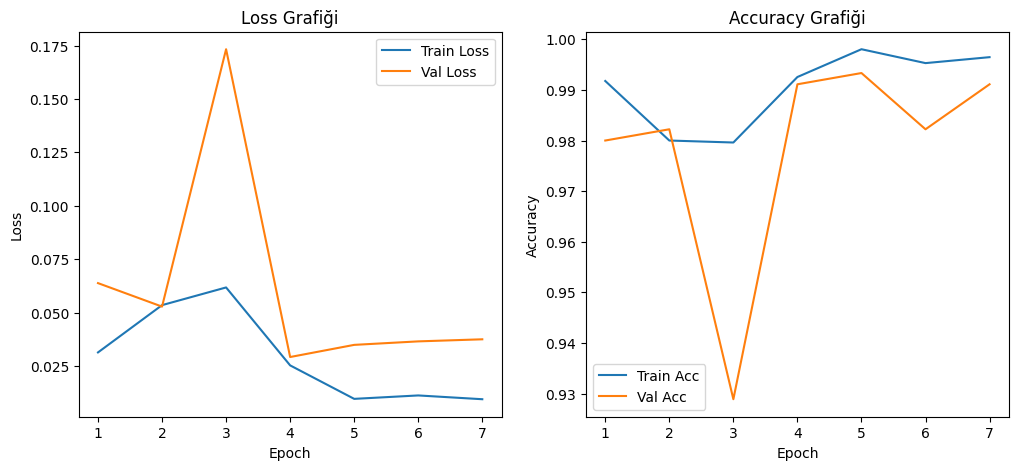

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_hist)+1)
tr_loss = [x[0] for x in train_hist]
tr_acc  = [x[1] for x in train_hist]
val_loss = [x[0] for x in val_hist]
val_acc  = [x[1] for x in val_hist]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, tr_loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Val Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Loss GrafiÄŸi")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, tr_acc, label="Train Acc")
plt.plot(epochs, val_acc, label="Val Acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.title("Accuracy GrafiÄŸi")
plt.legend()

plt.show()


## Modelin DeÄŸerlendirilmesi
Bu bÃ¶lÃ¼mde eÄŸitilen model, **test seti** Ã¼zerinde deÄŸerlendirilecektir.

- **Metrikler:** Confusion Matrix, Classification Report (Precision, Recall, F1)
- **Ã–rnekleme:** YanlÄ±ÅŸ sÄ±nÄ±flandÄ±rÄ±lan gÃ¶rsellerin gÃ¶rselleÅŸtirilmesi
- **AÃ§Ä±klanabilirlik:** Grad-CAM ile modelin dikkat ettiÄŸi bÃ¶lgeler

In [15]:
# âœ… En iyi modeli yÃ¼kle ve test setinde tahmin yap
import torch, numpy as np
from sklearn.metrics import classification_report, confusion_matrix

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_path = "best_model.pth"  # eÄŸitim bÃ¶lÃ¼mÃ¼nde kaydetmiÅŸtik
ckpt = torch.load(best_path, map_location=device)
model.load_state_dict(ckpt["model"])
model.to(device).eval()

y_true, y_pred, y_prob = [], [], []
with torch.no_grad():
    for x, y in test_loader:
        x = x.to(device)
        logits = model(x)
        probs = torch.softmax(logits, dim=1).cpu().numpy()
        pred = logits.argmax(1).cpu().numpy()
        y_true.extend(y.numpy().tolist())
        y_pred.extend(pred.tolist())
        y_prob.extend(probs.tolist())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

print("Test Ã¶rnek sayÄ±sÄ±:", len(y_true))
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


Test Ã¶rnek sayÄ±sÄ±: 582
              precision    recall  f1-score   support

   airplanes     1.0000    0.9841    0.9920       189
        cars     0.9847    1.0000    0.9923       193
        ship     1.0000    1.0000    1.0000       200

    accuracy                         0.9948       582
   macro avg     0.9949    0.9947    0.9948       582
weighted avg     0.9949    0.9948    0.9948       582



### Confusion Matrix
Hem **ham sayÄ±lar** hem de **normalize (% olarak)** gÃ¶sterilecektir.


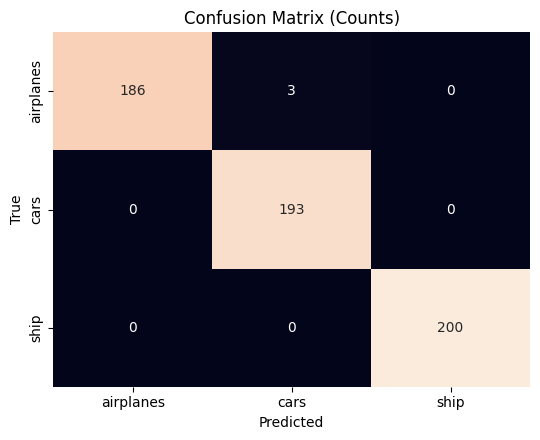

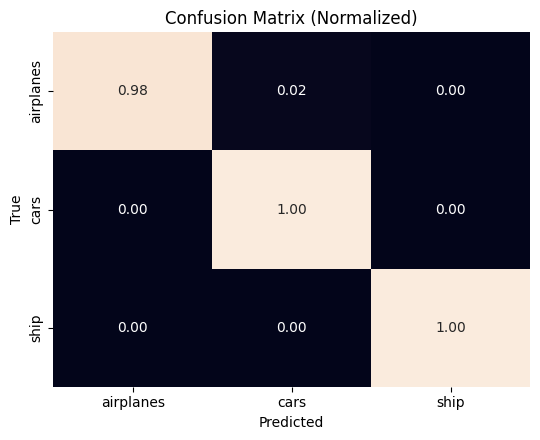

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, labels, normalize=False, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)), normalize=("true" if normalize else None))
    plt.figure(figsize=(5.5,4.5))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", 
                xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel("Predicted"); plt.ylabel("True"); plt.title(title)
    plt.tight_layout(); plt.show()

plot_cm(y_true, y_pred, class_names, normalize=False, title="Confusion Matrix (Counts)")
plot_cm(y_true, y_pred, class_names, normalize=True,  title="Confusion Matrix (Normalized)")


### YanlÄ±ÅŸ SÄ±nÄ±flandÄ±rÄ±lan Ã–rnekler
En yÃ¼ksek eminlikle (softmax skoru) **yanlÄ±ÅŸ** tahmin edilen gÃ¶rsellerden bir seÃ§ki.


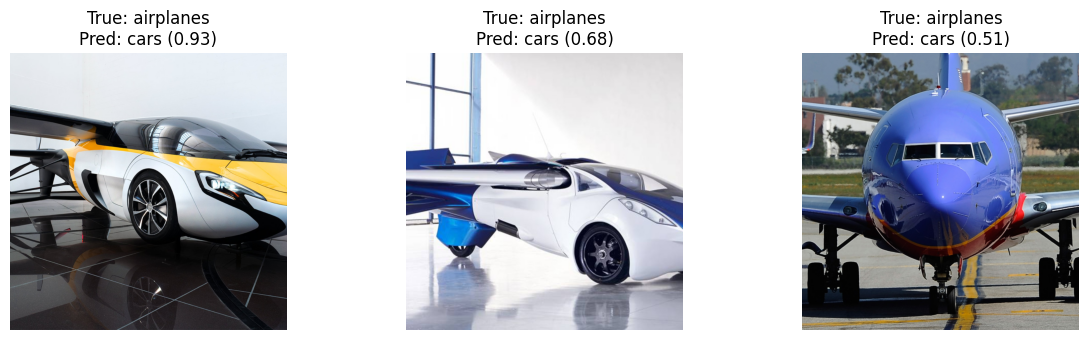

In [17]:
import os, math
from PIL import Image

# test_ds: ImageFolder; samples -> (path, class_idx)
test_paths = [s[0] for s in test_ds.samples]

wrong_idx = np.where(y_true != y_pred)[0]
# En emin olunan yanlÄ±ÅŸlardan 12 tanesini seÃ§ (skor farkÄ±na gÃ¶re)
if len(wrong_idx) > 0:
    conf_scores = y_prob[wrong_idx, y_pred[wrong_idx]]  # yanlÄ±ÅŸ tahmin edilen sÄ±nÄ±fÄ±n skoru
    order = np.argsort(-conf_scores)  # azalan
    show_idx = wrong_idx[order][:12]
else:
    show_idx = []

cols = 4
rows = math.ceil(len(show_idx)/cols) if len(show_idx)>0 else 1
plt.figure(figsize=(4*cols, 3.5*rows))

for i, idx in enumerate(show_idx):
    img = Image.open(test_paths[idx]).convert("RGB")
    plt.subplot(rows, cols, i+1)
    plt.imshow(img); plt.axis("off")
    t, p = class_names[y_true[idx]], class_names[y_pred[idx]]
    s = y_prob[idx, y_pred[idx]]
    plt.title(f"True: {t}\nPred: {p} ({s:.2f})")

if len(show_idx) == 0:
    plt.text(0.5, 0.5, "HatalÄ± Ã¶rnek bulunamadÄ± ðŸŽ‰", ha="center", va="center", fontsize=14)
    plt.axis("off")

plt.tight_layout(); plt.show()


### Grad-CAM (AÃ§Ä±klanabilirlik)

AÅŸaÄŸÄ±da **ResNet18** iÃ§in son konvolÃ¼syon katmanÄ±ndan Grad-CAM Ä±sÄ± haritasÄ± Ã¼retimi yapÄ±lÄ±r.
- Test setinden birkaÃ§ Ã¶rnek alÄ±nÄ±p **orijinal + CAM + overlay** gÃ¶rselleri Ã§izilir.


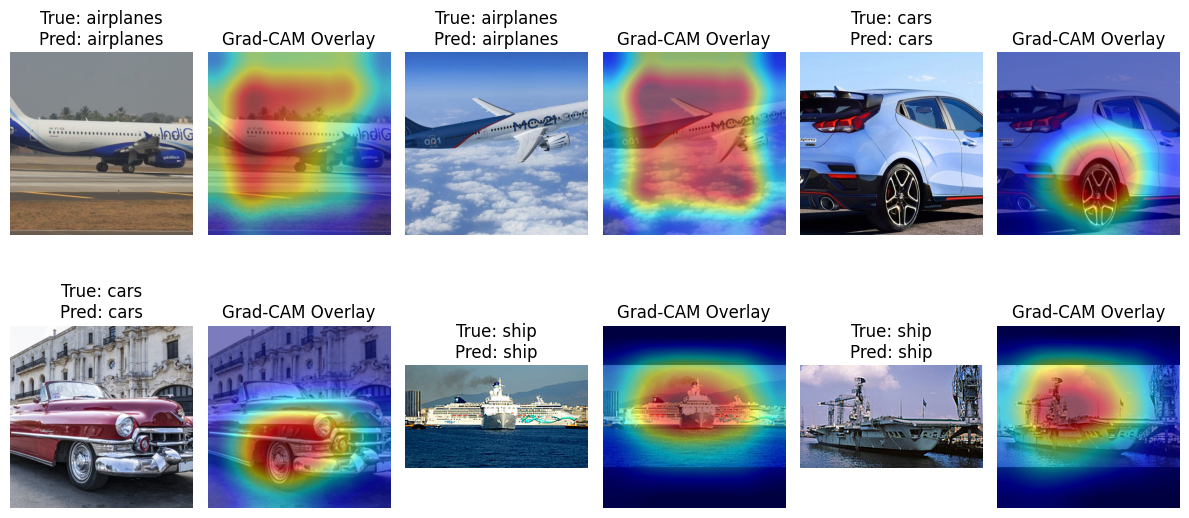

In [20]:
# ---- (1) Eski hook'lar varsa kapat ----
try:
    h1.remove()
except Exception:
    pass
try:
    h2.remove()
except Exception:
    pass

# ---- (2) Sadece FORWARD hook ile Grad-CAM ----
import torch, torch.nn.functional as F
import numpy as np, cv2
from PIL import Image
import matplotlib.pyplot as plt

# Hedef katman (ResNet18 son blok conv)
try:
    target_layer = model.layer4[1].conv2
except Exception:
    target_layer = list(model.layer4.children())[-1].conv2

acts = []

def fwd_hook(_, __, output):
    # aktivasyonlarÄ± sakla ve gradyanÄ± tutmak iÃ§in retain_grad() Ã§aÄŸÄ±r
    acts.clear()
    acts.append(output)
    output.retain_grad()

h1 = target_layer.register_forward_hook(fwd_hook)

def gradcam_on_tensor(x_tensor, pred_class=None):
    """x_tensor: [1,3,H,W], eval_tf uygulanmÄ±ÅŸ tensÃ¶r"""
    model.zero_grad()
    with torch.enable_grad():
        x_tensor.requires_grad_(True)
        logits = model(x_tensor)
        if pred_class is None:
            cls_idx = logits.argmax(1).item()
        else:
            cls_idx = int(pred_class)
        score = logits[0, cls_idx]
        score.backward(retain_graph=True)

    A = acts[-1][0]                 # (C,H,W) aktivasyon
    G = acts[-1].grad[0]            # (C,H,W) aynÄ± katmanÄ±n gradyanÄ±
    w = G.mean(dim=(1,2))           # (C,)
    cam = F.relu((w[:,None,None] * A).sum(0)).detach().cpu().numpy()
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
    return cam, cls_idx

def denorm_to_uint8(img_t):
    mean = np.array([0.485,0.456,0.406]).reshape(3,1,1)
    std  = np.array([0.229,0.224,0.225]).reshape(3,1,1)
    x = img_t.detach().cpu().numpy()
    x = (x * std + mean) * 255.0
    x = np.clip(x, 0, 255).astype(np.uint8)
    return np.transpose(x, (1,2,0))  # HWC

# ---- (3) Ã–rneklerde Grad-CAM Ã¼ret ----
model.eval()
N = min(6, len(test_ds))
indices = np.linspace(0, len(test_ds)-1, num=N, dtype=int)

plt.figure(figsize=(12, 6))
plot_i = 1

for idx in indices:
    img_path, true_idx = test_ds.samples[idx]
    pil = Image.open(img_path).convert("RGB")

    x = eval_tf(pil).unsqueeze(0).to(device)

    cam, pred_idx = gradcam_on_tensor(x)

    vis = denorm_to_uint8(x[0])
    H, W = vis.shape[:2]
    cam_resized = cv2.resize((cam*255).astype(np.uint8), (W, H), interpolation=cv2.INTER_CUBIC)
    heat = cv2.applyColorMap(cam_resized, cv2.COLORMAP_JET)
    overlay = (0.5*heat + 0.5*vis[:,:,::-1]).astype(np.uint8)

    plt.subplot(2, N, plot_i); plot_i += 1
    plt.imshow(pil); plt.axis("off")
    plt.title(f"True: {class_names[true_idx]}\nPred: {class_names[pred_idx]}")

    plt.subplot(2, N, plot_i); plot_i += 1
    plt.imshow(overlay[:,:,::-1]); plt.axis("off")
    plt.title("Grad-CAM Overlay")

plt.tight_layout(); plt.show()

# hook'u kapat
h1.remove()


### Hiperparametre Optimizasyonu (KÄ±sa Tarama)

AÅŸaÄŸÄ±daki kÃ¼Ã§Ã¼k grid ile farklÄ± ayarlarÄ± deniyoruz:  
- Learning Rate (lr)  
- Batch Size  
- Weight Decay (wd)  
- Freeze (Ã¶n katmanlarÄ± dondurma/dondurmama)

Her konfigÃ¼rasyon iÃ§in kÄ±sa bir eÄŸitim (Ã¶r. 5 epoch) yapÄ±yoruz ve en iyi **val acc/val loss** deÄŸerlerini tabloya yazÄ±yoruz.


In [21]:
from torchvision.models import resnet18
import torch.nn as nn
from torch.utils.data import DataLoader
import math
import pandas as pd
from tqdm import tqdm

# Grid tanÄ±mÄ±
grid = [
    {"lr":1e-3, "batch":32, "wd":1e-4, "freeze":0},
    {"lr":5e-4, "batch":32, "wd":1e-4, "freeze":0},
    {"lr":1e-4, "batch":32, "wd":5e-5, "freeze":0},
    {"lr":5e-4, "batch":64, "wd":1e-4, "freeze":0},
    {"lr":5e-4, "batch":32, "wd":1e-4, "freeze":1},  # backbone dondurulmuÅŸ
]

def make_loaders(batch):
    train_loader = DataLoader(train_ds, batch_size=batch, shuffle=True,  num_workers=2, pin_memory=True)
    val_loader   = DataLoader(val_ds,   batch_size=batch, shuffle=False, num_workers=2, pin_memory=True)
    return train_loader, val_loader

def build_model(num_classes, freeze=False):
    m = resnet18(weights="IMAGENET1K_V1")
    if freeze:
        for p in m.layer1.parameters(): p.requires_grad=False
        for p in m.layer2.parameters(): p.requires_grad=False
        for p in m.layer3.parameters(): p.requires_grad=False
    m.fc = nn.Linear(m.fc.in_features, num_classes)
    return m.to(device)

def train_val_one_cfg(cfg, epochs=5):
    train_loader, val_loader = make_loaders(cfg["batch"])
    m = build_model(num_classes, freeze=cfg["freeze"])
    opt = torch.optim.Adam(filter(lambda p: p.requires_grad, m.parameters()),
                           lr=cfg["lr"], weight_decay=cfg["wd"])
    sched = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, mode="min", factor=0.5, patience=1)
    crit = nn.CrossEntropyLoss()

    best_val = {"loss": math.inf, "acc": 0.0}
    for ep in range(1, epochs+1):
        # train
        m.train(); tr_loss=0; tr_ok=0; tr_all=0
        for xb, yb in tqdm(train_loader, leave=False):
            xb, yb = xb.to(device), yb.to(device)
            opt.zero_grad()
            out = m(xb); loss = crit(out,yb)
            loss.backward(); opt.step()
            tr_loss += loss.item()*xb.size(0)
            tr_ok += (out.argmax(1)==yb).sum().item(); tr_all+=xb.size(0)

        # val
        m.eval(); val_loss=0; val_ok=0; val_all=0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                out = m(xb); loss = crit(out,yb)
                val_loss += loss.item()*xb.size(0)
                val_ok += (out.argmax(1)==yb).sum().item(); val_all+=xb.size(0)
        tr_loss/=tr_all; tr_acc=tr_ok/tr_all
        val_loss/=val_all; val_acc=val_ok/val_all
        sched.step(val_loss)
        if val_loss < best_val["loss"]:
            best_val = {"loss": val_loss, "acc": val_acc}
        print(f"cfg={cfg} | ep {ep}: tr_loss {tr_loss:.4f} tr_acc {tr_acc:.3f} | val_loss {val_loss:.4f} val_acc {val_acc:.3f}")
    return best_val

# TÃ¼m konfigÃ¼rasyonlarÄ± dene
hp_results=[]
for cfg in grid:
    best = train_val_one_cfg(cfg, epochs=5)  # her deneme 5 epoch
    hp_results.append({**cfg, **{"best_val_loss":best["loss"], "best_val_acc":best["acc"]}})

# SonuÃ§larÄ± tablo halinde gÃ¶ster
hp_df = pd.DataFrame(hp_results).sort_values("best_val_acc", ascending=False).reset_index(drop=True)
hp_df


cfg={'lr': 0.001, 'batch': 32, 'wd': 0.0001, 'freeze': 0} | ep 1: tr_loss 0.1505 tr_acc 0.944 | val_loss 0.0665 val_acc 0.978


cfg={'lr': 0.001, 'batch': 32, 'wd': 0.0001, 'freeze': 0} | ep 2: tr_loss 0.0952 tr_acc 0.969 | val_loss 0.0685 val_acc 0.982


cfg={'lr': 0.001, 'batch': 32, 'wd': 0.0001, 'freeze': 0} | ep 3: tr_loss 0.0650 tr_acc 0.979 | val_loss 0.0549 val_acc 0.978


cfg={'lr': 0.001, 'batch': 32, 'wd': 0.0001, 'freeze': 0} | ep 4: tr_loss 0.0629 tr_acc 0.979 | val_loss 0.2054 val_acc 0.942


cfg={'lr': 0.001, 'batch': 32, 'wd': 0.0001, 'freeze': 0} | ep 5: tr_loss 0.0427 tr_acc 0.987 | val_loss 0.0912 val_acc 0.980


cfg={'lr': 0.0005, 'batch': 32, 'wd': 0.0001, 'freeze': 0} | ep 1: tr_loss 0.1038 tr_acc 0.964 | val_loss 0.0422 val_acc 0.982


cfg={'lr': 0.0005, 'batch': 32, 'wd': 0.0001, 'freeze': 0} | ep 2: tr_loss 0.0482 tr_acc 0.986 | val_loss 0.1279 val_acc 0.949


cfg={'lr': 0.0005, 'batch': 32, 'wd': 0.0001, 'freeze': 0} | ep 3: tr_loss 0.0442 tr_acc 0.985 | val_loss 0.0246 val_acc 0.993


cfg={'lr': 0.0005, 'batch': 32, 'wd': 0.0001, 'freeze': 0} | ep 4: tr_loss 0.0213 tr_acc 0.993 | val_loss 0.0744 val_acc 0.971


cfg={'lr': 0.0005, 'batch': 32, 'wd': 0.0001, 'freeze': 0} | ep 5: tr_loss 0.0204 tr_acc 0.995 | val_loss 0.0500 val_acc 0.982


cfg={'lr': 0.0001, 'batch': 32, 'wd': 5e-05, 'freeze': 0} | ep 1: tr_loss 0.0792 tr_acc 0.976 | val_loss 0.0124 val_acc 0.993


cfg={'lr': 0.0001, 'batch': 32, 'wd': 5e-05, 'freeze': 0} | ep 2: tr_loss 0.0154 tr_acc 0.996 | val_loss 0.0093 val_acc 0.996


cfg={'lr': 0.0001, 'batch': 32, 'wd': 5e-05, 'freeze': 0} | ep 3: tr_loss 0.0071 tr_acc 0.998 | val_loss 0.0098 val_acc 0.996


cfg={'lr': 0.0001, 'batch': 32, 'wd': 5e-05, 'freeze': 0} | ep 4: tr_loss 0.0044 tr_acc 0.999 | val_loss 0.0101 val_acc 0.998


cfg={'lr': 0.0001, 'batch': 32, 'wd': 5e-05, 'freeze': 0} | ep 5: tr_loss 0.0073 tr_acc 0.998 | val_loss 0.0037 val_acc 1.000


cfg={'lr': 0.0005, 'batch': 64, 'wd': 0.0001, 'freeze': 0} | ep 1: tr_loss 0.0714 tr_acc 0.971 | val_loss 0.2404 val_acc 0.949


cfg={'lr': 0.0005, 'batch': 64, 'wd': 0.0001, 'freeze': 0} | ep 2: tr_loss 0.0315 tr_acc 0.989 | val_loss 0.0208 val_acc 0.993


cfg={'lr': 0.0005, 'batch': 64, 'wd': 0.0001, 'freeze': 0} | ep 3: tr_loss 0.0190 tr_acc 0.993 | val_loss 0.0425 val_acc 0.984


cfg={'lr': 0.0005, 'batch': 64, 'wd': 0.0001, 'freeze': 0} | ep 4: tr_loss 0.0102 tr_acc 0.995 | val_loss 0.0202 val_acc 0.993


cfg={'lr': 0.0005, 'batch': 64, 'wd': 0.0001, 'freeze': 0} | ep 5: tr_loss 0.0195 tr_acc 0.994 | val_loss 0.0589 val_acc 0.982


cfg={'lr': 0.0005, 'batch': 32, 'wd': 0.0001, 'freeze': 1} | ep 1: tr_loss 0.0605 tr_acc 0.978 | val_loss 0.0106 val_acc 0.996


cfg={'lr': 0.0005, 'batch': 32, 'wd': 0.0001, 'freeze': 1} | ep 2: tr_loss 0.0099 tr_acc 0.996 | val_loss 0.0140 val_acc 0.993


cfg={'lr': 0.0005, 'batch': 32, 'wd': 0.0001, 'freeze': 1} | ep 3: tr_loss 0.0114 tr_acc 0.997 | val_loss 0.0152 val_acc 0.989


cfg={'lr': 0.0005, 'batch': 32, 'wd': 0.0001, 'freeze': 1} | ep 4: tr_loss 0.0146 tr_acc 0.996 | val_loss 0.0061 val_acc 1.000


cfg={'lr': 0.0005, 'batch': 32, 'wd': 0.0001, 'freeze': 1} | ep 5: tr_loss 0.0063 tr_acc 0.997 | val_loss 0.0079 val_acc 0.996


lr  batch       wd  freeze  best_val_loss  best_val_acc
0  0.0001     32  0.00005       0       0.003697      1.000000
1  0.0005     32  0.00010       1       0.006099      1.000000
2  0.0005     32  0.00010       0       0.024642      0.993333
3  0.0005     64  0.00010       0       0.020243      0.993333
4  0.0010     32  0.00010       0       0.054856      0.977778